In [14]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np

In [2]:
df_a = pd.read_csv('../work/metrics.csv')

In [3]:
df_b = pd.read_csv('../work/metrics2.csv')

In [5]:
df = pd.concat([df_a, df_b])

In [7]:
df_coreg = df[df['coregionalized'] == True]

In [8]:
df_no_coreg = df[df['coregionalized'] == False]

In [89]:
def get_lc_data(df, metric='mae_0_1'):
    train_sizes = df['train_size'].unique()
    
    ts = []
    means = []
    stds = []
    for train_size in train_sizes: 
        if train_size>2:
            ts.append(train_size)
            rows = df[df['train_size']==train_size]
            mean = np.mean(rows[metric])
            std = np.std(rows[metric]) / np.sqrt(len(rows))
            means.append(mean)
            stds.append(std) 

        
    return np.array(ts), np.array(means), np.array(stds)

In [96]:
ts_c_mae_0, m_c_mae_0, std_c_mae_0 = get_lc_data(df_coreg, 'mae_0')
ts_nc_mae_0, m_nc_mae_0, std_nc_mae_0 = get_lc_data(df_no_coreg, 'mae_0')

ts_c_mae_1, m_c_mae_1, std_c_mae_1 = get_lc_data(df_coreg, 'mae_0_1')
ts_nc_mae_1, m_nc_mae_1, std_nc_mae_1 = get_lc_data(df_no_coreg, 'mae_0_1')



ts_c_r2_0, m_c_r2_0, std_c_r2_0 = get_lc_data(df_coreg, 'r2_0')
ts_nc_r2_0, m_nc_r2_0, std_nc_r2_0 = get_lc_data(df_no_coreg, 'r2_0')

ts_c_r2_1, m_c_r2_1, std_c_r2_1 = get_lc_data(df_coreg, 'r2_0_1')
ts_nc_r2_1, m_nc_r2_1, std_nc_r2_1 = get_lc_data(df_no_coreg, 'r2_0_1')


ts_c_max_0, m_c_max_0, std_c_max_0 = get_lc_data(df_coreg, 'max_error_0')
ts_nc_max_0, m_nc_max_0, std_nc_max_0 = get_lc_data(df_no_coreg, 'max_error_0')

ts_c_max_1, m_c_max_1, std_c_max_1 = get_lc_data(df_coreg, 'max_error_0_1')
ts_nc_max_1, m_nc_max_1, std_nc_max_1 = get_lc_data(df_no_coreg, 'max_error_0_1')

/Users/kevinmaikjablonka/opt/miniconda3/envs/dispersant_basf/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  import sys
/Users/kevinmaikjablonka/opt/miniconda3/envs/dispersant_basf/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  


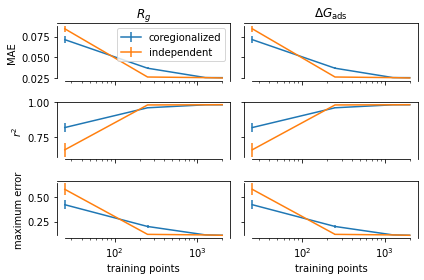

In [109]:
plt.rcParams['font.family'] = 'sans-serif'
    
fig, ax = plt.subplots(3,2, sharey='row', sharex='all')

for b in ax:
    for a in b:
        a.spines['left'].set_smart_bounds(True)
        a.spines['bottom'].set_smart_bounds(True)
        
ax[0][0].set_xscale('log')
ax[0][0].errorbar(ts_c_mae_0, m_c_mae_0, std_c_mae_0, label='coregionalized')
ax[0][0].errorbar(ts_nc_mae_0, m_nc_mae_0, std_nc_mae_0, label='independent')

ax[0][1].errorbar(ts_c_mae_1, m_c_mae_1, std_c_mae_1)
ax[0][1].errorbar(ts_nc_mae_1, m_nc_mae_1, std_nc_mae_1)


ax[1][0].errorbar(ts_c_r2_0, m_c_r2_0, std_c_r2_0)
ax[1][0].errorbar(ts_nc_r2_0, m_nc_r2_0, std_nc_r2_0)

ax[1][1].errorbar(ts_c_r2_1, m_c_r2_1, std_c_r2_1)
ax[1][1].errorbar(ts_nc_r2_1, m_nc_r2_1, std_nc_r2_1)


ax[2][0].errorbar(ts_c_max_0, m_c_max_0, std_c_max_0)
ax[2][0].errorbar(ts_nc_max_0, m_nc_max_0, std_nc_max_0)

ax[2][1].errorbar(ts_c_max_1, m_c_max_1, std_c_max_1)
ax[2][1].errorbar(ts_nc_max_1, m_nc_max_1, std_nc_max_1)


ax[2][0].set_xlabel('training points')
ax[2][1].set_xlabel('training points')

ax[0][0].set_ylabel('MAE')
ax[1][0].set_ylabel('$r^2$')
ax[2][0].set_ylabel('maximum error')

ax[0][0].set_title('$R_g$')
ax[0][1].set_title('$\Delta G_\mathrm{ads}$')

ax[0][0].legend()

fig.tight_layout()

fig.savefig('learning_curves_coregionalized.pdf', bbox_inches='tight')

In [110]:
df.head()

,Unnamed: 0,r2_0,mae_0,max_error_0,r2_0_1,mae_0_1,max_error_0_1,max_var_0,min_var_0,mean_var_0,median_var_0,std_var_0,max_var_1,min_var_1,mean_var_1,median_var_1,std_var_1,train_size,coregionalized
0,0,-1.885304e+01,0.182714,0.551470,-1.885304e+01,0.182714,0.551470,0.155958,0.022680,0.113605,0.117425,1.187859e-02,15.207360,12.930111,14.483699,14.548961,2.029620e-01,2,True
1,1,-1.522003e+06,0.198539,0.632113,-1.522003e+06,0.198539,0.632113,0.226997,0.226977,0.226997,0.226997,1.210080e-06,4.458827,4.458420,4.458825,4.458827,2.376918e-05,2,False
2,2,-8.969966e+15,0.197060,0.682535,-8.969966e+15,0.197060,0.682535,0.097387,0.097387,0.097387,0.097387,1.053321e-08,4.814390,4.814388,4.814389,4.814389,4.647985e-07,2,True
3,3,-9.986170e+04,0.197455,0.692079,-9.986170e+04,0.197455,0.692079,0.237287,0.236867,0.237285,0.237287,2.128607e-05,1.732491,1.729426,1.732482,1.732491,1.554151e-04,2,False
4,4,-3.265904e+01,0.226449,0.727619,-3.265904e+01,0.226449,0.727619,0.357308,0.073556,0.223646,0.223825,4.919523e-02,11.852477,5.773661,8.989046,8.992861,1.053905e+00,2,True


In [111]:
ts_c_max_var_0, m_c_max_var_0, std_c_max_var_0 = get_lc_data(df_coreg, 'max_var_0')
ts_nc_max_var_0, m_nc_max_var_0, std_nc_max_var_0 = get_lc_data(df_no_coreg, 'max_var_0')

ts_c_max_var_1, m_c_max_var_1, std_c_max_var_1 = get_lc_data(df_coreg, 'max_var_1')
ts_nc_max_var_1, m_nc_max_var_1, std_nc_max_var_1 = get_lc_data(df_no_coreg, 'max_var_1')



ts_c_mean_var_0, m_c_mean_var_0, std_c_mean_var_0 = get_lc_data(df_coreg, 'mean_var_0')
ts_nc_mean_var_0, m_nc_mean_var_0, std_nc_mean_var_0 = get_lc_data(df_no_coreg, 'mean_var_0')

ts_c_mean_var_1, m_c_mean_var_1, std_c_mean_var_1 = get_lc_data(df_coreg, 'mean_var_1')
ts_nc_mean_var_1, m_nc_mean_var_1, std_nc_mean_var_1 = get_lc_data(df_no_coreg, 'mean_var_1')



/Users/kevinmaikjablonka/opt/miniconda3/envs/dispersant_basf/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  import sys
/Users/kevinmaikjablonka/opt/miniconda3/envs/dispersant_basf/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  


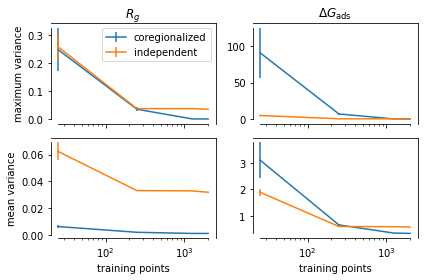

In [124]:
plt.rcParams['font.family'] = 'sans-serif'
    
fig, ax = plt.subplots(2,2, sharex='all')

for b in ax:
    for a in b:
        a.spines['left'].set_smart_bounds(True)
        a.spines['bottom'].set_smart_bounds(True)
        
ax[0][0].set_xscale('log')
ax[0][0].errorbar(ts_c_max_var_0, m_c_max_var_0, std_c_max_var_0, label='coregionalized')
ax[0][0].errorbar(ts_nc_max_var_0, m_nc_max_var_0, std_nc_max_var_0, label='independent')

ax[0][1].errorbar(ts_c_max_var_1, m_c_max_var_1, std_c_max_var_1, label='coregionalized')
ax[0][1].errorbar(ts_nc_max_var_1, m_nc_max_var_1, std_nc_max_var_1, label='independent')



ax[1][0].errorbar(ts_c_mean_var_0, m_c_mean_var_0, std_c_mean_var_0, label='coregionalized')
ax[1][0].errorbar(ts_nc_mean_var_0, m_nc_mean_var_0, std_nc_mean_var_0, label='independent')

ax[1][1].errorbar(ts_c_mean_var_1, m_c_mean_var_1, std_c_mean_var_1, label='coregionalized')
ax[1][1].errorbar(ts_nc_mean_var_1, m_nc_mean_var_1, std_nc_mean_var_1, label='independent')

ax[0][0].legend()

ax[0][0].set_title('$R_g$')
ax[0][1].set_title('$\Delta G_\mathrm{ads}$')

ax[0][0].set_ylabel('maximum variance')
ax[1][0].set_ylabel('mean variance')

ax[1][0].set_xlabel('training points')
ax[1][1].set_xlabel('training points')

fig.tight_layout()

fig.savefig('variance_lc.pdf', bbox_inches='tight')
